In [4]:
# Load in our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age)  với chi phí y tế (charges); và mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges).

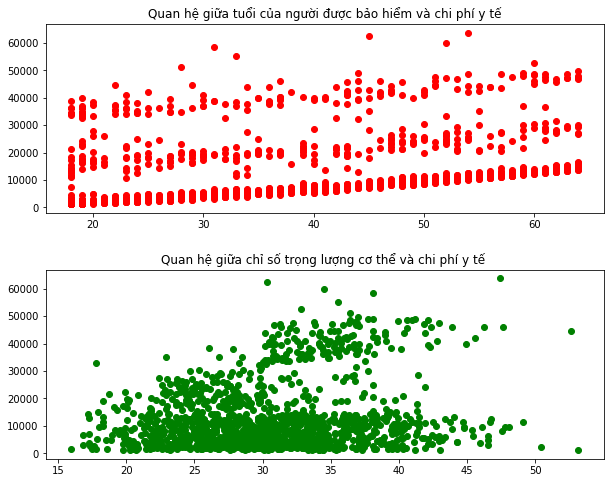

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
ax1.scatter(df.age, df.charges,color='r')
ax1.set_title('Quan hệ giữa tuổi của người được bảo hiểm và chi phí y tế')
ax2.scatter(df.bmi, df.charges,color='g')
ax2.set_title('Quan hệ giữa chỉ số trọng lượng cơ thể và chi phí y tế ');

#### Chuyển các biến có kiểu categorical: sex, smoker, region thành các biến “Dummy”: sex_female , sex_male, smoker_no, smoker_yes, region_northeast  region_northwest region_southeast, region_southwest. Sau đó loại bớt 2 trường không cần thiết:  sex_male, smoker_no.

In [8]:
df1 = pd.get_dummies(df)
df1.drop(columns=['sex_male','smoker_no'])

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1


#### Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

In [9]:
df1.info() # no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [12]:
y = df1['charges'].values.reshape(-1,1)
X = df1.drop(columns=['charges'])
print(y.shape)
print(X.shape)

(1338, 1)
(1338, 11)


In [14]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070, 1)
(268, 1)


#### Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, các biến đầu vào là các trường còn lại. Đánh giá mô hình.

In [16]:
LR = LinearRegression().fit(X_train, y_train)
y_predict = LR.predict(X_test)
y_predict

array([[ 8969.55027444],
       [ 7068.74744287],
       [36858.41091155],
       [ 9454.67850053],
       [26973.17345656],
       [10864.11316424],
       [  170.28084136],
       [16903.45028662],
       [ 1092.43093614],
       [11218.34318352],
       [28101.68455267],
       [ 9377.73460205],
       [ 5263.0595179 ],
       [38416.04221107],
       [40255.82339284],
       [37098.25353123],
       [15240.39392306],
       [35912.88264434],
       [ 9112.52398703],
       [31461.92108909],
       [ 3847.68845883],
       [10130.12001517],
       [ 2370.54189389],
       [ 7140.21550828],
       [11301.76782638],
       [12961.65366224],
       [14509.47251876],
       [ 6159.8976107 ],
       [ 9963.85857263],
       [ 2177.85718217],
       [ 9115.93673493],
       [13073.68932159],
       [ 4561.82376202],
       [ 3408.20756033],
       [ 4459.81359745],
       [13032.06505076],
       [ 1979.99357292],
       [ 8813.28303302],
       [33271.29124448],
       [32585.51583927],


In [17]:
score=r2_score(y_test,y_predict)
print('R2-score is ',score)
print('Mean_sqrd_error is =',mean_squared_error(y_test,y_predict))
print('Root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_predict)))

R2-score is  0.7835929767120723
Mean_sqrd_error is = 33596915.85136147
Root_mean_squared error of is = 5796.2846592762735
